In [29]:
import numpy as np
from MieSppForce import green_func,frenel,force,dipoles

c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7

def get_Gee(wl, z0, eps_interp, stop):
    k = 2*np.pi/wl/1e-9
    omega = 2*np.pi*c_const/wl/1e-9
    GE, GH = green_func.green_ref_00(wl, z0, eps_interp, stop)
    Gee = GE*k**2/eps0_const
    Gmm = k**2 * GH
    rotGE, rotGH = green_func.rot_green_ref_00(wl, z0, eps_interp, stop)
    Gem = 1j * omega * mu0_const * rotGH 
    Gme = -1j * omega * rotGE
    
    

In [30]:
from MieSppForce import dipoles,force,frenel, green_func
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

c_const = 299792458

In [31]:
eps_Si = frenel.get_interpolate('Si')
eps_Au = frenel.get_interpolate('Au')

wl=800
dist = 2
STOP=45
angle=25*np.pi/180
phase=0
a_angle = np.pi/4

R = np.linspace(50,120,40)

P,M = np.empty((len(R),3), dtype=complex),np.empty((len(R),3), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0, dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m
    
    

  0%|          | 0/40 [00:00<?, ?it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 40/40 [00:17<00:00,  2.28it/s]


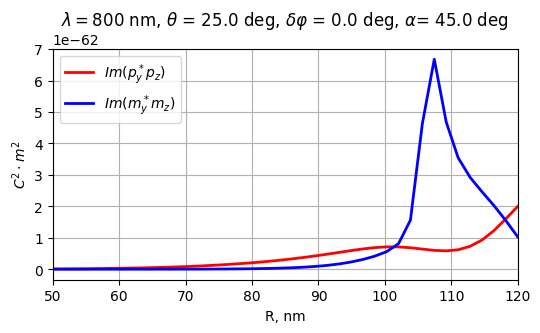

In [32]:
plt.figure(figsize=(6,3))

plt.plot(R, np.imag(np.conj(P[:,1])*P[:,2]), label='$Im(p_y^* p_z)$', lw=2, c='r')

plt.plot(R, np.imag(np.conj(M[:,1])*M[:,2])/c_const**2, label='$Im(m_y^* m_z)$', lw=2, c='b')

plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')

plt.xlim([R[0],R[-1]])
plt.xlabel('R, nm')
plt.ylabel('$C^2 \cdot m^2$')
plt.grid()
plt.legend()
plt.show()


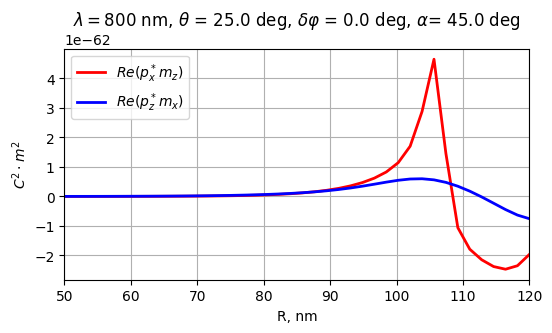

In [7]:
plt.figure(figsize=(6,3))

plt.plot(R, np.real(np.conj(P[:,0])*M[:,2])/c_const, label='$Re(p_x^* m_z)$', lw=2, c='r')

plt.plot(R, np.real(np.conj(P[:,2])*M[:,0])/c_const, label='$Re(p_z^* m_x)$', lw=2, c='b')

plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')

plt.xlim([R[0],R[-1]])
plt.xlabel('R, nm')
plt.ylabel('$C^2 \cdot m^2$')
plt.grid()
plt.legend()
plt.show()


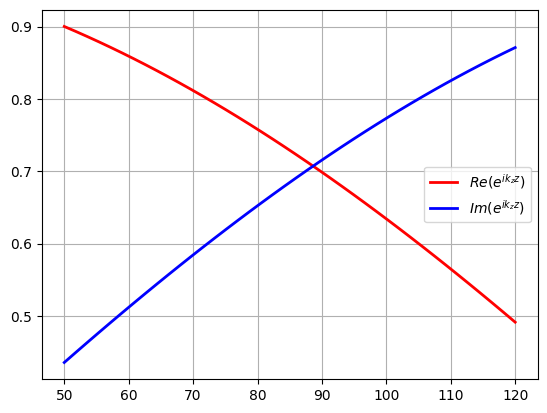

In [25]:
z = (dist+R)
kz = 2*np.pi/wl/np.cos(angle)

plt.plot(R, np.real(np.exp(1j*z*kz)), label='$Re(e^{i k_z z})$', c='r', lw=2)
plt.plot(R, np.imag(np.exp(1j*z*kz)), label='$Im(e^{i k_z z})$', c='b', lw=2)
plt.legend()
plt.grid()


In [26]:
R = np.linspace(50,160,50)
alphaE, alphaH = np.empty(len(R), dtype=complex), np.empty(len(R), dtype=complex)
P,M = np.empty((len(R),3), dtype=complex),np.empty((len(R),3), dtype=complex)


wl=800
dist = 2
STOP=45
angle=25*np.pi/180
phase=0
a_angle = 0

for i in range(len(R)):
    alphaE[i], alphaH[i] = dipoles.alpha_v2(wl, R[i], eps_Si)
    
for i in tqdm(range(len(R))):
    point = [0,0, dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m

100%|██████████| 50/50 [00:00<00:00, 2946.93it/s]


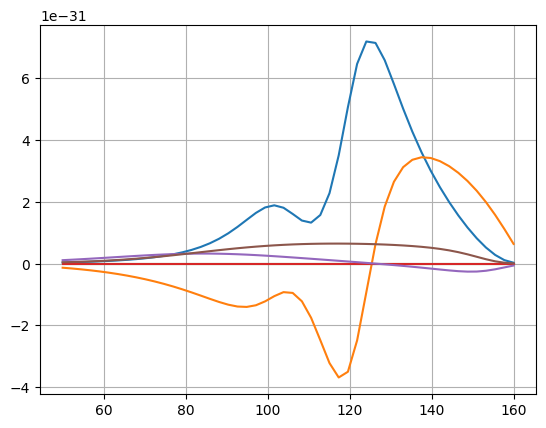

In [27]:
plt.plot(R, np.real(P[:,0]))
plt.plot(R, np.imag(P[:,0]))

plt.plot(R, np.real(P[:,1]))
plt.plot(R, np.imag(P[:,1]))

plt.plot(R, np.real(P[:,2]))
plt.plot(R, np.imag(P[:,2]))

plt.grid()
plt.show()

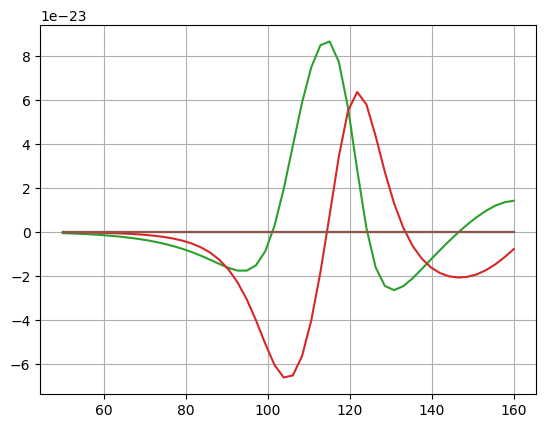

In [28]:
plt.plot(R, np.real(M[:,0]))
plt.plot(R, np.imag(M[:,0]))

plt.plot(R, np.real(M[:,1]))
plt.plot(R, np.imag(M[:,1]))

plt.plot(R, np.real(M[:,2]))
plt.plot(R, np.imag(M[:,2]))

plt.grid()
plt.show()

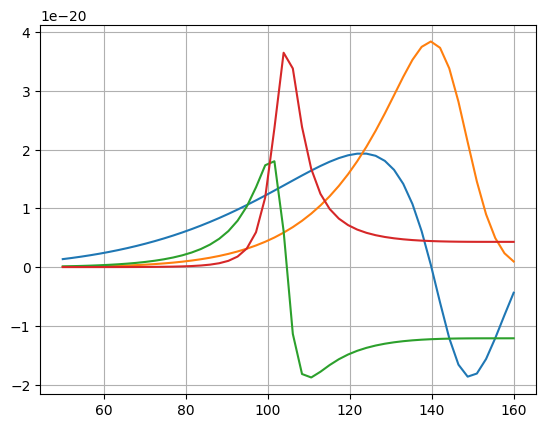

In [ ]:
plt.plot(R, np.real(alphaE))
plt.plot(R, np.imag(alphaE))

plt.plot(R, np.real(alphaH))
plt.plot(R, np.imag(alphaH))
plt.grid()
plt.show()